In [57]:

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt 
import seaborn as sns
   
import scikitplot as skplt

In [58]:
# Import `os` 
import os

# Retrieve current working directory (`cwd`)
cwd = os.getcwd()


# # Change directory 
# os.chdir("/path/to/your/folder")

# # List all files and directories in current directory
# os.listdir('.')

In [59]:
dataset=pd.read_excel('CMPS_441_Assignment_1_DataSample.xlsx')
# dataset.head()

In [60]:
threshold=[0.25,0.35,0.55,0.65,0.75]
predict_score=dataset['Predicted Class Score']
true_label=dataset['Actual Class Label']

In [61]:
# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

In [70]:
def con(predict_score,true_label,thresh):
    
    target_pred=[]
    for j in range(len(predict_score)):
#         print(predict_score)
#         print(thresh)
        if (predict_score[j]<= thresh):
            target_pred.insert(j,'Not Cancer')
        else:
            target_pred.insert(j,'Cancer')
        
    tn, fp, fn, tp = confusion_matrix(true_label,target_pred).ravel() 
#     print(tn, fp, fn, tp)
    cm=confusion_matrix(true_label,target_pred)
    
#     print(cm)
#   [imshow(X=array, cmap=colormap]] 
    plt.imshow(cm,cmap=plt.cm.GnBu)
    
    classNames = ['Not Cancer','Cancer']
    plt.title('Confusion Matrix When Threshold is {}'.format(thresh))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    tick_marks = np.arange(len(classNames))
    #tick_marks= array([0, 1])
    
#     matplotlib.pyplot.yticks(ticks=array like list of positions, labels=array like list of labels, **kwargs)

    plt.xticks(tick_marks, classNames, rotation=45) 
    plt.yticks(tick_marks, classNames)
    
    
#[00 01]
#[10 11]
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(i,j, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


    tpr= tp/(tp+fn) #sensitivity
    spec=tn/(fp+tn)
    fpr=1-(spec) #1-specificity
    print(tpr)
    print(fpr)
    return(tpr,fpr)


16 1 9 3
[[16  1]
 [ 9  3]]


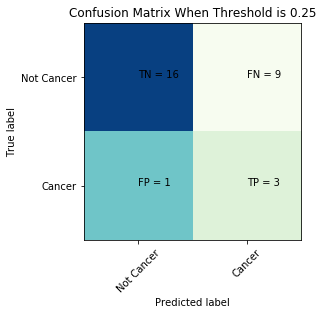

0.25
0.05882352941176472


In [71]:
thresh0=con(predict_score,true_label,0.25)
# thresh1=con(predict_score,true_label,threshold[1])
# thresh2=con(predict_score,true_label,0.55)
# thresh3=con(predict_score,true_label,0.65)
# thresh4=con(predict_score,true_label,0.75)



In [64]:
print(thresh0)
print(thresh1)
print(thresh2)
print(thresh3)
print(thresh4)

(0.25, 0.05882352941176472)
(0.5, 0.11764705882352944)
(0.9166666666666666, 0.2941176470588235)
(0.9166666666666666, 0.4117647058823529)
(1.0, 0.5294117647058824)


In [65]:
# Binarize the output


# from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# a= lb_make.fit_transform(true_label)
# a

[0.05882352941176472, 0.11764705882352944, 0.2941176470588235, 0.4117647058823529, 0.5294117647058824]
[0.25, 0.5, 0.9166666666666666, 0.9166666666666666, 1.0]


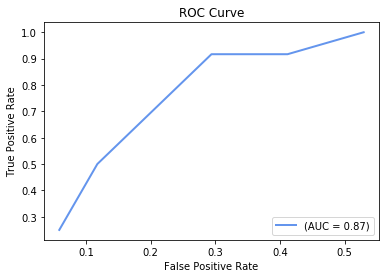

In [66]:
x_fpr=[thresh0[1],thresh1[1],thresh2[1],thresh3[1],thresh4[1]] #fpr or 100-specificty
print(x_fpr)
y_tpr=[thresh0[0],thresh1[0],thresh2[0],thresh3[0],thresh4[0]] #sensitivity
print(y_tpr)

a=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1]              
t_auc=roc_auc_score(a,predict_score)
t_auc

plt.title('ROC Curve')
plt.plot(x_fpr,y_tpr, color='cornflowerblue',lw=2, label='(AUC = %0.2f)' % t_auc)
# plt.plot(x_fpr,y_tpr, color='cornflowerblue',lw=2, label='(AUC = {})'.format(t_auc))


plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
'use this for excel sheet with multiple sheets'

# # Assign spreadsheet filename to `file`
# file= 'CMPS_441_Assignment_1_DataSample.xlsx'

#  # Load spreadsheet
# xl=pd.ExcelFile(file)

# # Print the sheet names
# print(xl.sheet_names)
 # Load a sheet into a DataFrame by name: df1
# df1=xl.parse('Sample_Data_Prediction_Scores')